# Time-Series-Forecast

In [25]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# import for time series
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima

In [26]:
# import the training data
train = pd.read_csv("C:\\Users\\Vishaly\\OneDrive - Hong Kong Baptist University\\Miscellaneous\\Vishaly\\Coding\\Data-Science-Projects\\Time-Series-Forecast\\data\\train.csv")
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [27]:
# import oil price data
oil = pd.read_csv("C:\\Users\\Vishaly\\OneDrive - Hong Kong Baptist University\\Miscellaneous\\Vishaly\\Coding\\Data-Science-Projects\\Time-Series-Forecast\\data\\oil.csv")
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


## 1 Exploratory Analysis

### 1.1 Data overview

In [28]:
train.shape

(3000888, 6)

In [29]:
# display all the missing values
train[train.isnull().any(axis=1)] # no missing values

,id,date,store_nbr,family,sales,onpromotion


In [30]:
train.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [31]:
train.dtypes

id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object

### 1.2 Graphs

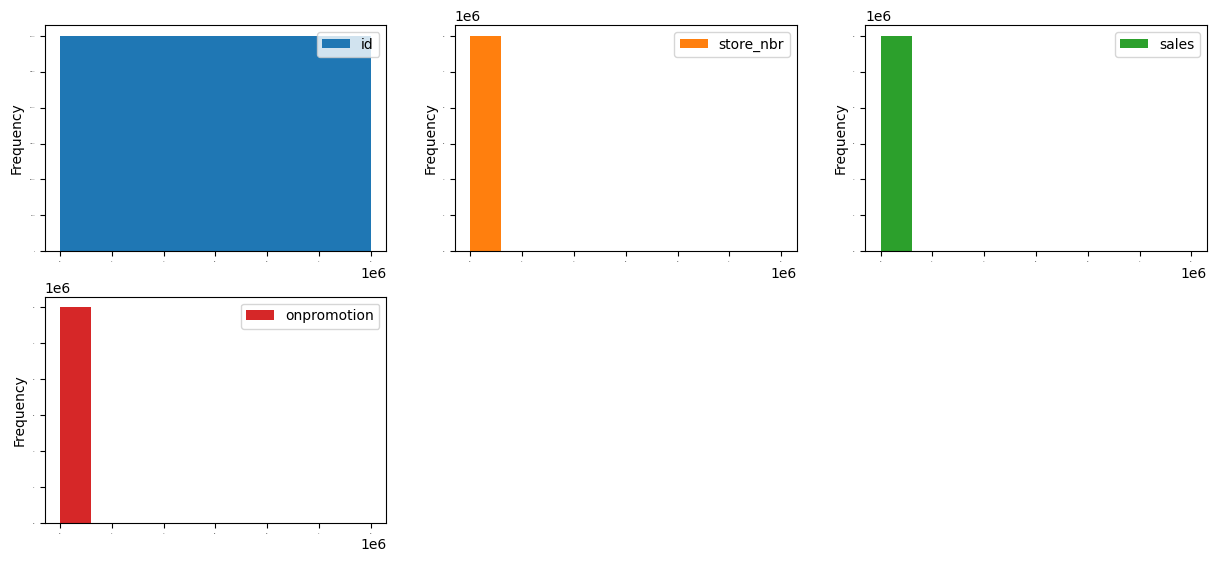

In [32]:
# draw a histogram of all numerical variables with labels
figsize = (15,10)
train.plot(kind='hist', subplots=True, layout=(3,3), sharex=False, sharey=False, fontsize=1, figsize=figsize)
plt.show()

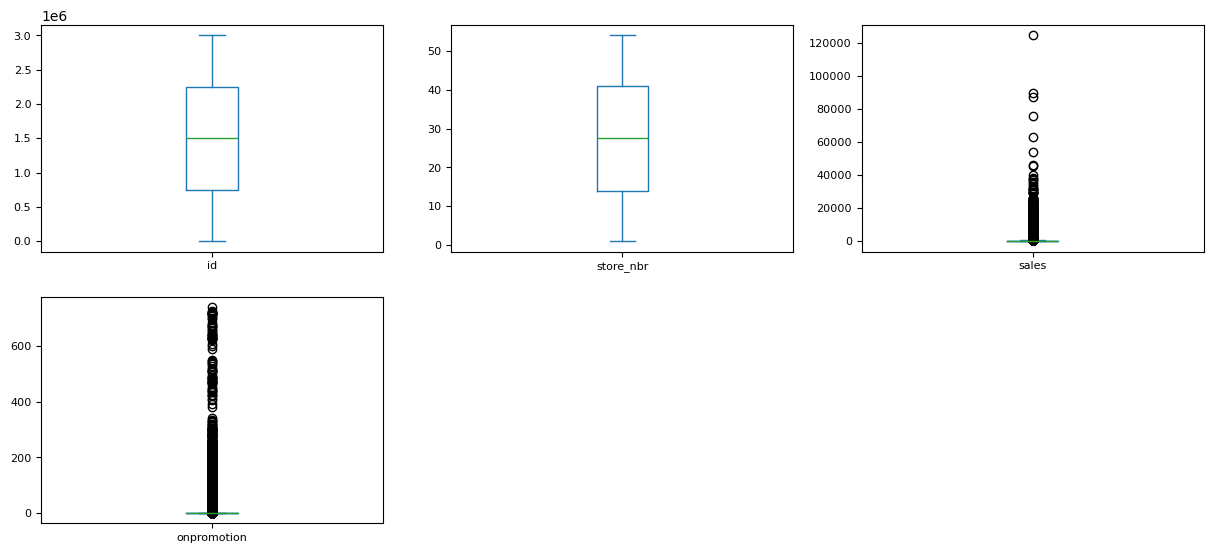

In [33]:
# draw a boxplot with labels
figsize = (15,10)
train.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, fontsize=8, figsize=figsize)
plt.show()

## 2 Outliers

In [34]:
# display the values in sales
train['sales'].values

array([   0.   ,    0.   ,    0.   , ..., 2419.729,  121.   ,   16.   ])

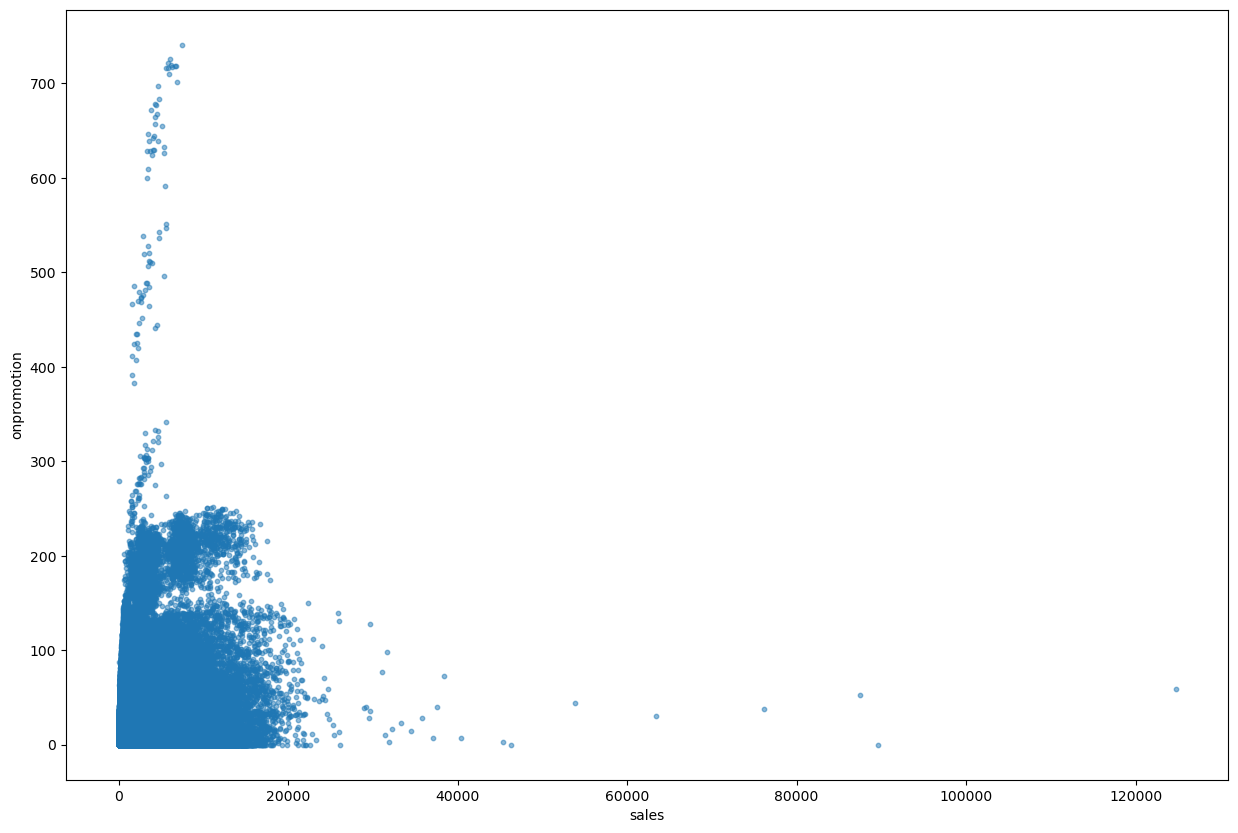

In [35]:
# draw a plot for sales
figsize = (15,10)
train.plot(kind='scatter', x='sales', y='onpromotion', alpha=0.5, s=10, figsize=figsize)
plt.show()

### 2.1 Sales

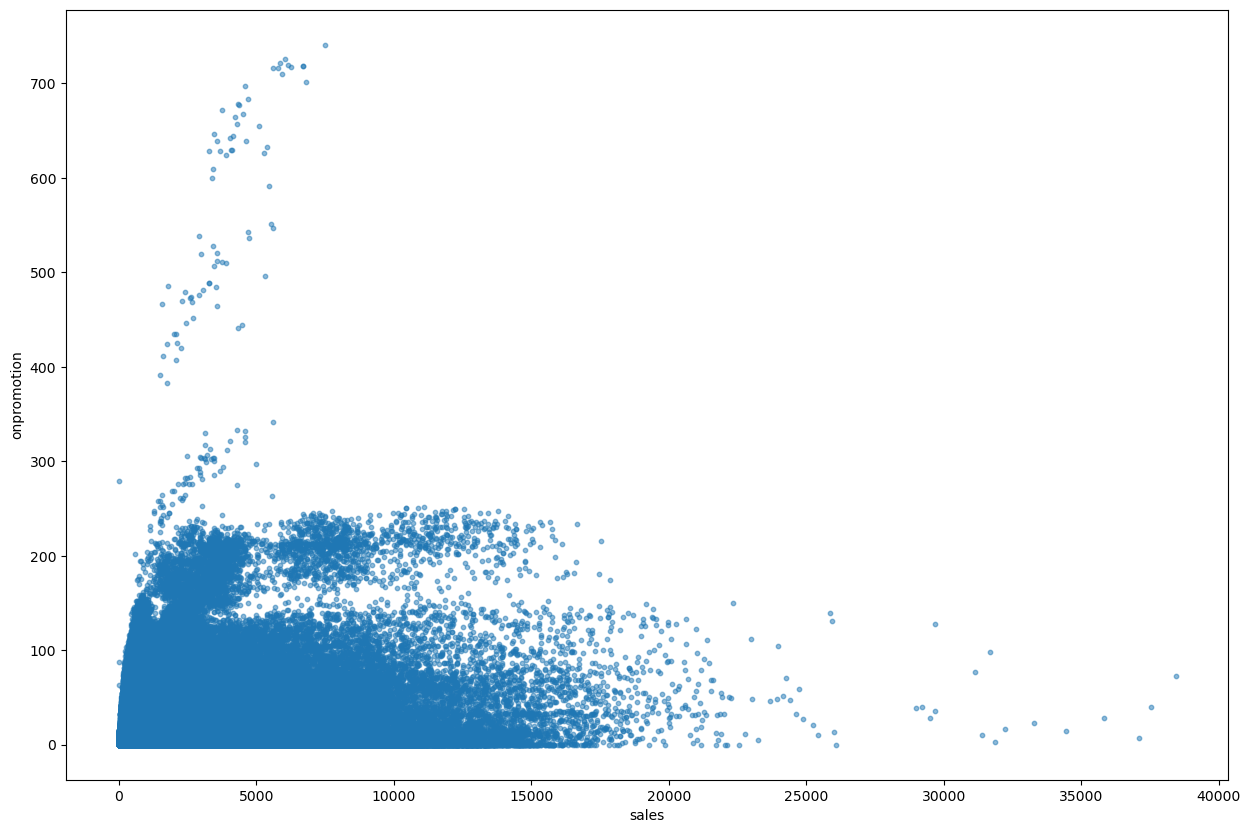

In [36]:
# drop the values in sales column above 40000
train = train[train['sales'] < 40000] # drop the values above 40000

# draw a plot for sales
figsize = (15,10)
train.plot(kind='scatter', x='sales', y='onpromotion', alpha=0.5, s=10, figsize=figsize)
plt.show()

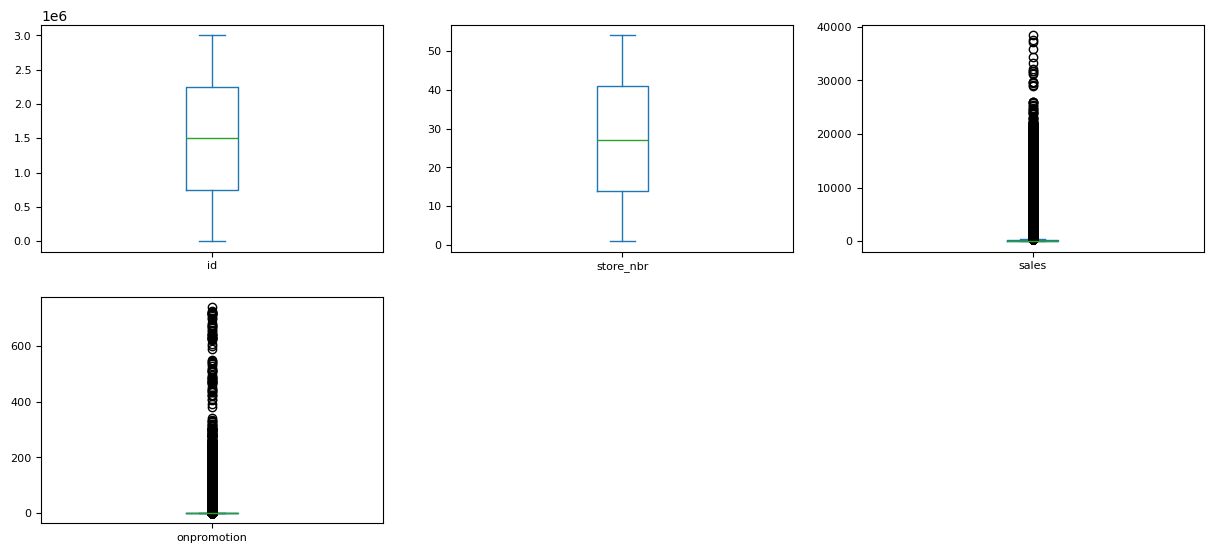

In [37]:
# draw a boxplot for sales and onpromotion
figsize = (15,10)
train.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, fontsize=8, figsize=figsize)
plt.show()

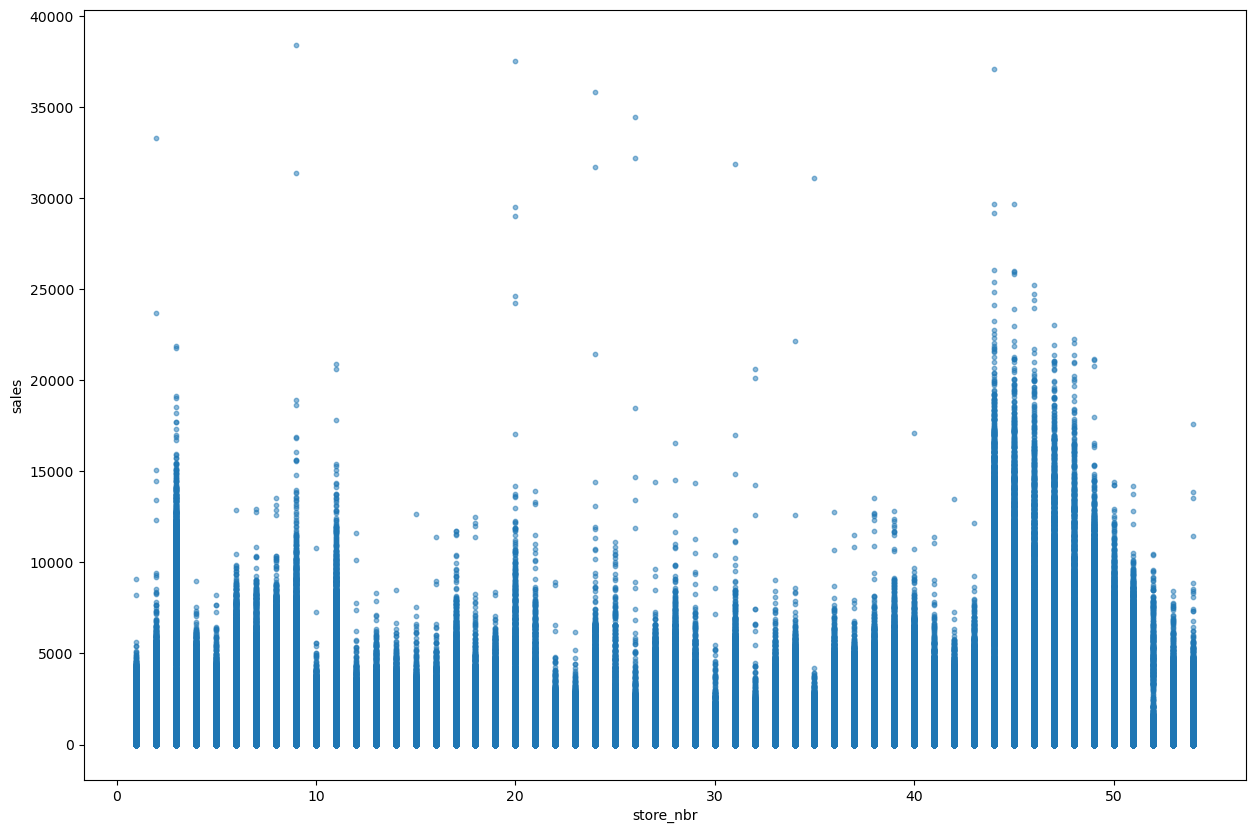

In [38]:
# draw a scatter plot for sales and store_nbr
figsize = (15,10)
train.plot(kind='scatter', x='store_nbr', y='sales', alpha=0.5, s=10, figsize=figsize)
plt.show()

Oil prices

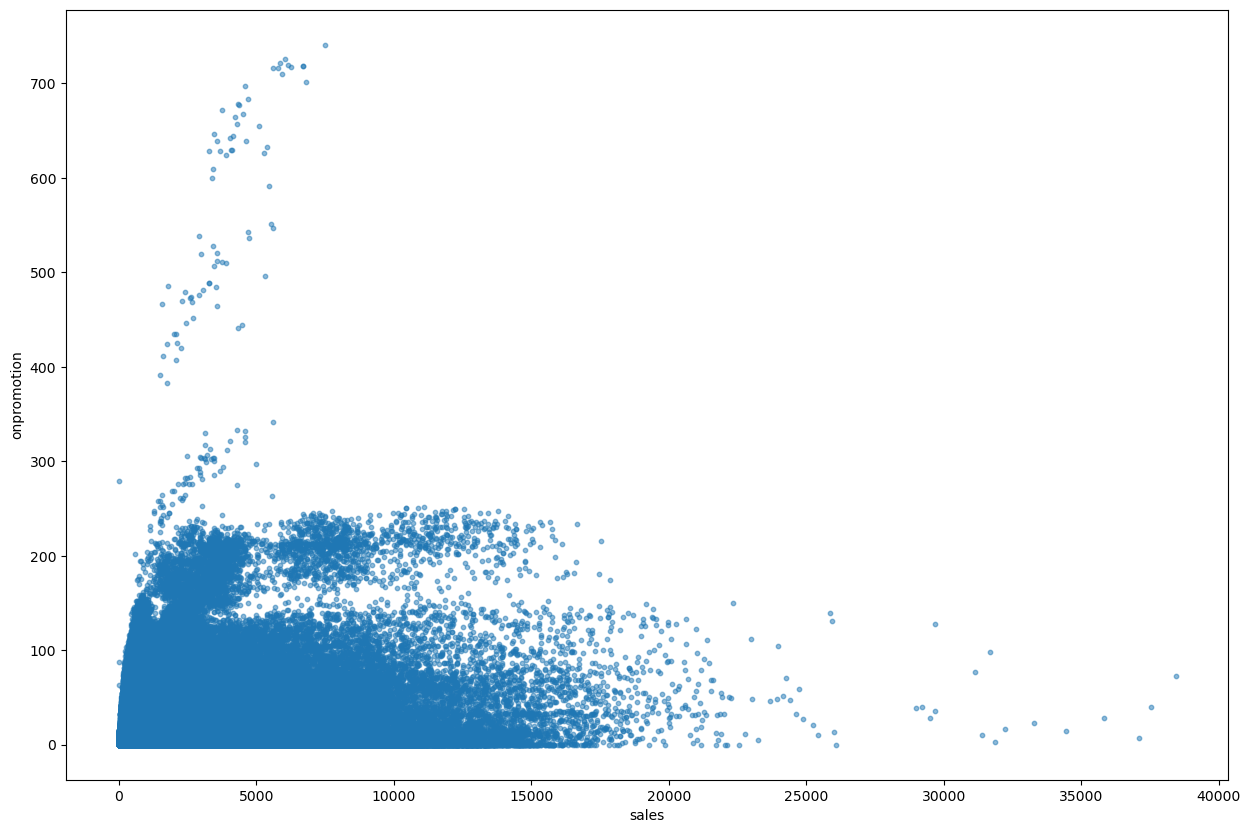

In [39]:
# relate the sales and oil price
train.plot(kind='scatter', x='sales', y='onpromotion', alpha=0.5, s=10, figsize=(15,10))
plt.show()

## 3 Encoding

In [40]:
# display the non-numerical variables
train.dtypes

id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object

In [ ]:
# convert 

## 4 Data splitting

In [41]:
# split the data into train and test
from sklearn.model_selection import train_test_split

train, test = train_test_split(train, test_size=0.2, random_state=42)

## 5 Model training

In [42]:
# use ARIMA to create a model
from statsmodels.tsa.arima.model import ARIMA

# create the model
model = ARIMA(train['sales'], order=(1,1,1))

In [43]:
print("Shape of train:", train.shape)

Shape of train: (2400703, 6)


In [44]:
# fit the model
model.fit(train)

TypeError: bad operand type for unary -: 'str'

In [ ]:
# make predictions
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

In [ ]:
# plot the predictions
model.plot(forecast)
plt.show()

In [ ]:
# print the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

In [ ]:
# print the summary
print(model.summary())

In [ ]:
# print the diagnostics
print(model.diagnostics())

In [ ]:
# fit the model
#model.fit(train)

In [ ]:
# make predictions
#future = model.make_future_dataframe(periods=365)
#forecast = model.predict(future)

# plot the predictions
#model.plot(forecast)
#plt.show()

# plot the components
#model.plot_components(forecast)
#plt.show()

# print the forecast
#print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# print the summary
#print(model.summary())

# print the diagnostics
#print(model.diagnostics())

In [ ]:
# make predictions
#future = model.make_future_dataframe(periods=365)
#forecast = model.predict(future)

# plot the predictions
#model.plot(forecast)
#plt.show()

In [ ]:
# import the test data
test = pd.read_csv("C:\\Users\\Vishaly\\OneDrive - Hong Kong Baptist University\\Miscellaneous\\Vishaly\\Coding\\Data-Science-Projects\\Time-Series-Forecast\\data\\test.csv")
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
